In [1]:
import numpy as np

In [2]:
import pandas as pa
df = pa.read_csv('test_data.csv')

In [3]:
dfAt=0

In [4]:
while(df.at[dfAt,'class']!='QSO'):
    dfAt=dfAt+1

In [5]:
dfAt

165

In [6]:
list(df.columns.values)

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'class',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

In [7]:
df.at[dfAt,'class']

'QSO'

In [8]:
# checking out 0th row of data
for i in list(df.columns.values): print(i, df.at[dfAt,i])

objid 1.23765e+18
ra 57.82499868
dec 0.215608938
u 17.68028
g 17.3205
r 17.16499
i 17.086660000000002
z 17.03985
run 109
rerun 301
camcol 4
field 155
specobjid 1.39851e+18
class QSO
redshift 0.6822563
plate 1242
mjd 52901
fiberid 509


In [9]:
# data points per column
df.size / df.columns.values.size

10000.0

In [10]:
# function for adding leading 0s to string with run value from savedData

def leadingZeroes(short, finalLength):
    if (finalLength-len(short)<=0): return short
    for i in range(finalLength-len(short)): short="0"+short
    return short

In [11]:
dataList=['rerun','run','camcol','field']
savedData=[] 
for i in dataList:
    savedData.append(str(df.at[dfAt,i]))
# savedData contains: rerun, run, camcol, field

In [12]:
# adding run6 value to savedData 
savedData.append(leadingZeroes(savedData[1],6))

In [13]:
# formatting field value already in savedData
savedData[3]=leadingZeroes(savedData[3],4)

In [14]:
# adding band value to savedData
savedData.append('r')

In [15]:
savedData

['301', '109', '4', '0155', '000109', 'r']

In [16]:
range(len(savedData))

range(0, 6)

In [17]:
# testing downloading one fits file for savedData
from astropy.io import fits
from astropy.utils.data import download_file
rerun,run,camcol,field,run6,band=[savedData[i] for i in range(len(savedData))]

In [18]:
rerun,run,camcol,field,run6,band

('301', '109', '4', '0155', '000109', 'r')

Reading in Data with formatted variables
------

In [19]:
base_url = "http://data.sdss3.org/sas/dr10/boss/photoObj/frames/{0}/{1}/{2}/frame-{5}-{4}-{2}-{3}.fits.bz2".format(rerun,run,camcol,field,run6,band)
print(base_url)
image_file = download_file(base_url, cache=True )

http://data.sdss3.org/sas/dr10/boss/photoObj/frames/301/109/4/frame-r-000109-4-0155.fits.bz2


In [20]:
# can we open this data
#fits.getdata(image_file)
fits.open(image_file)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f1fd84fdef0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f1fd6bf1320>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f1fd6bf1f98>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f1fd564c978>]

In [21]:
# can we open this data yes
fits.getdata(image_file)[0]
#fits.open(image_file,ignore_missing_end=True)

array([ 0.02740479,  0.04187012,  0.0080719 , ..., -0.00224304,
       -0.01191711,  0.02194214], dtype=float32)

Storing Data 
----

In [22]:
# opening fits and storing in hdu_list
# normally image information is located in the PRIMARY block
# indexing hdu_list lets us access information blocks
hdu_list=fits.open(image_file)
hdu_list.info()

Filename: /u/mx/fa/jgreshik/.astropy/cache/download/py3/09a52eb38f886c1884f1f3a5076e0a2b
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      85   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [23]:
image_data=hdu_list[0].data

In [24]:
# store data in 2D numpy array
print(type(image_data))
# dimensions of image
#
print(image_data.shape)

<class 'numpy.ndarray'>
(1489, 2048)


In [25]:
# only care about image data
# close .fits file
hdu_list.close()

SHORTCUT
if we do not need to examine fits header we can call fits.getdata and bypass previous steps: 
    


image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)


Viewing image data and getting basic statistics
-----

In [26]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib

In [27]:
dir=matplotlib.matplotlib_fname()

In [28]:
matplotlib.rc_file(dir)
import matplotlib.pyplot as plt
%matplotlib inline

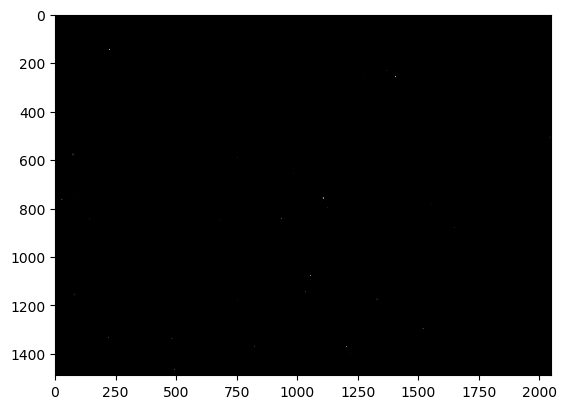

In [29]:
plt.imshow(image_data,cmap='gray')

In [30]:
# show some stats about image
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: -0.12182617
Max: 239.75
Mean: 0.015274067
Stdev: 0.9293731


data is fairly non-unique
----

In [31]:
print(type(image_data.flatten()))

<class 'numpy.ndarray'>


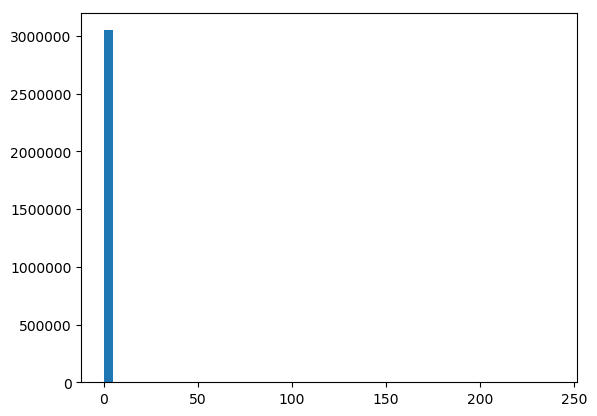

In [32]:
NBINS = 50
histogram = plt.hist(image_data.flatten(), NBINS)

plotting log scale has much better luck
-----

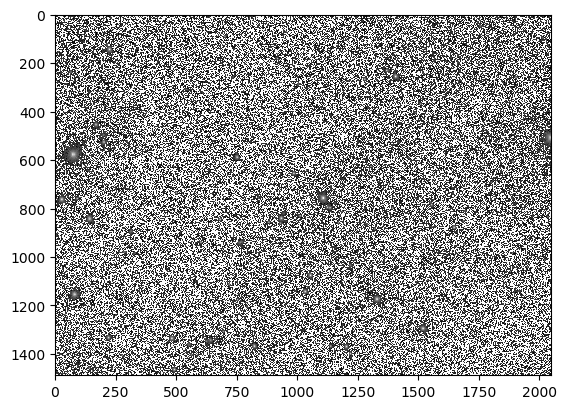

In [33]:
from matplotlib.colors import LogNorm

plt.imshow(image_data, cmap='gray', norm=LogNorm())

concat some images
----

In [34]:
base_url

'http://data.sdss3.org/sas/dr10/boss/photoObj/frames/301/109/4/frame-r-000109-4-0155.fits.bz2'

In [35]:
# base_url2 = "http://data.sdss3.org/sas/dr10/boss/photoObj/frames/301/109/4/frame-z-000109-4-0155.fits.bz2"
# image_file2 = download_file(base_url, cache=True )
# hdu_list2=fits.open(image_file)
# plt.imshow(image_data, cmap='gray', norm=LogNorm())
# # concat the different bands?

In [36]:
filters=['u','g','r','i','z']

In [37]:
# make list of all filters of image
image_list=[download_file("http://data.sdss3.org/sas/dr10/boss/photoObj/frames/301/109/4/frame-{0}-000109-4-0155.fits.bz2".format(i)) for i in filters]

In [38]:
image_concat = [ fits.getdata(image) for image in image_list ]
final_image = np.sum(image_concat, axis=0)

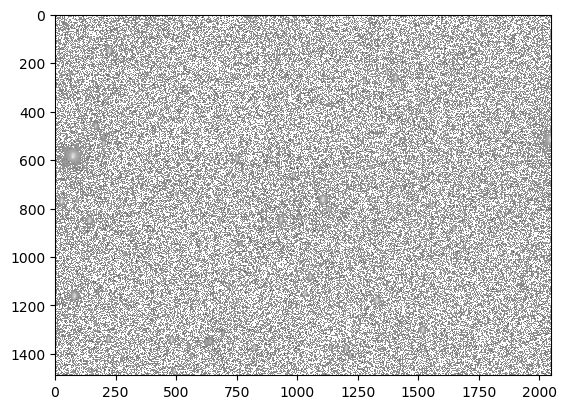

In [39]:
plt.imshow(final_image, cmap='gray', norm=LogNorm())

concat didn't quite work ?
-----

looking at concat(ed) image data distribution
-------

(array([1.3000e+01, 2.7000e+01, 3.1000e+01, 2.1000e+01, 3.8000e+01,
        3.5000e+01, 4.1000e+01, 6.5000e+01, 5.1000e+01, 6.0000e+01,
        8.2000e+01, 7.7000e+01, 8.4000e+01, 9.8000e+01, 1.2400e+02,
        1.4800e+02, 1.2700e+02, 1.5700e+02, 1.7400e+02, 2.2600e+02,
        2.4500e+02, 2.5400e+02, 3.0400e+02, 3.1500e+02, 3.5300e+02,
        3.6900e+02, 4.5300e+02, 4.6700e+02, 5.3700e+02, 5.4600e+02,
        6.2500e+02, 6.9700e+02, 8.0300e+02, 8.7300e+02, 9.5100e+02,
        1.0050e+03, 1.1070e+03, 1.2230e+03, 1.3550e+03, 1.4920e+03,
        1.5960e+03, 1.7720e+03, 1.8240e+03, 2.0100e+03, 2.1070e+03,
        2.3130e+03, 2.7440e+03, 2.7980e+03, 3.1170e+03, 3.2510e+03,
        3.5140e+03, 3.8870e+03, 4.0730e+03, 4.3800e+03, 4.8340e+03,
        5.0770e+03, 5.4090e+03, 5.8110e+03, 6.3070e+03, 6.5620e+03,
        6.9700e+03, 7.4010e+03, 8.0320e+03, 8.4440e+03, 9.0600e+03,
        9.4370e+03, 1.0168e+04, 1.0651e+04, 1.1080e+04, 1.1717e+04,
        1.2601e+04, 1.2919e+04, 1.3708e+04, 1.44

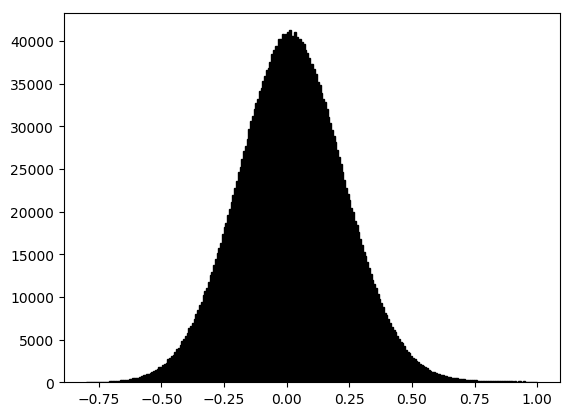

In [41]:
plt.hist(final_image.ravel(), bins=256, range=(-0.8, 1.0), fc='k', ec='k')

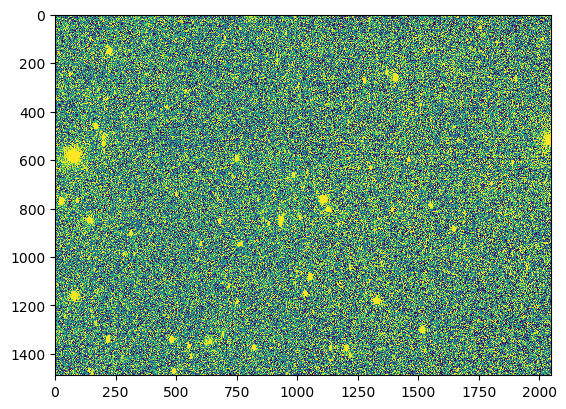

In [42]:
imgplot = plt.imshow(final_image, clim=(-.3, 0.3))

looking at normal image (r filter) distribution 
-------

(array([0.00000e+00, 0.00000e+00, 8.00000e+00, 3.10000e+01, 7.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.10000e+01, 5.80000e+01,
        2.70000e+01, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.40000e+01,
        1.54000e+02, 8.00000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.90000e+01, 2.13000e+02, 2.47000e+02, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 4.30000e+01, 3.43000e+02, 7.35000e+02, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.60000e+01, 6.06000e+02, 1.32100e+03,
        1.70000e+01, 0.00000e+00, 0.00000e+00, 1.40000e+01, 8.54000e+02,
        2.78500e+03, 1.84000e+02, 0.00000e+00, 0.00000e+00, 1.20000e+01,
        1.16600e+03, 3.64100e+03, 1.28000e+03, 0.00000e+00, 0.00000e+00,
        3.00000e+00, 1.41600e+03, 5.25300e+03, 3.85900e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.05200e+03, 7.53100e+03, 7.91500e+03,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 9.81000e+02, 1.04880e+04,
        1.51190e+04, 0.00000e+00, 0.00000e+00, 0.00

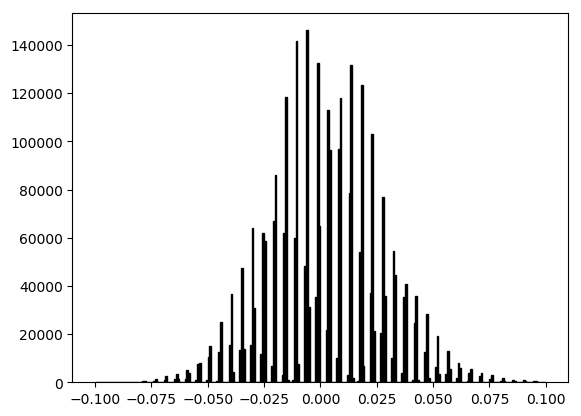

In [43]:
plt.hist(image_data.ravel(), bins=256, range=(-0.1, 0.1), fc='k', ec='k')

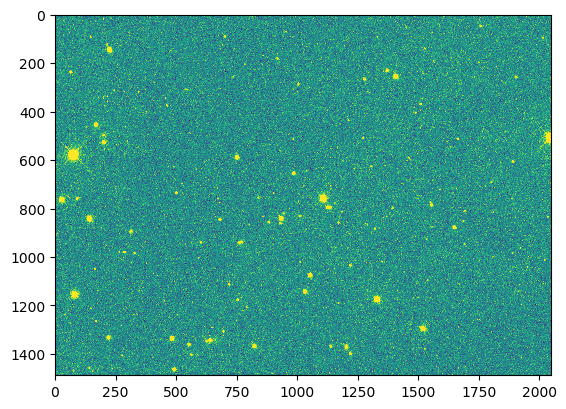

In [44]:
imgplot = plt.imshow(image_data, clim=(-.1, 0.1))

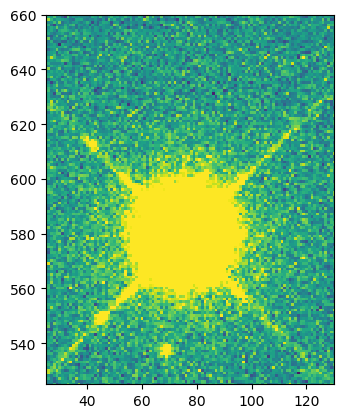

In [45]:
plt.axis([25,130,525,660])
plt.imshow(image_data, clim=(-.1, 0.1))

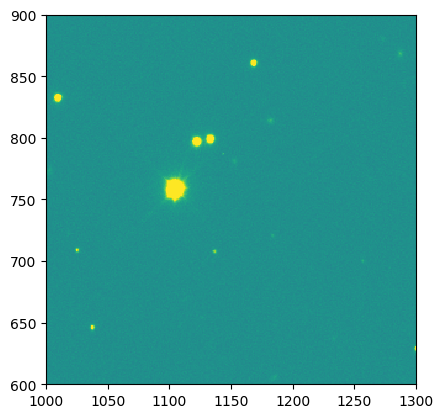

In [46]:
plt.axis([1000,1300,600,900])
#plt.imshow(image_data,clim=(-0.3, 0.1))
plt.imshow(image_data,clim=(-1, 1))

Apply to Classifier
----